In [1]:
import glob
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
#from base import ROOT_DIR

In [7]:
# Carpeta de datos
path_train = ROOT_DIR /"Data/Train"
path_test = ROOT_DIR /"Data/Test"

# 1.1 Importing Train Data

## 1.1.1 Checking ESP data 2019

In [13]:
data_pump_2019 = pd.read_csv(path_train/"high_freq_2019.csv")
data_pump_2019

WELL_ID        DATE  CURRENT  PRESS_DESC  FREQUENCY  \
0      DEEPWATER-000XAR  2019-02-25    72.42     4252.87      57.44   
1      DEEPWATER-000XAR  2019-02-26    72.77     4203.62      57.44   
2      DEEPWATER-000XAR  2019-02-27    72.29     4271.55      57.45   
3      DEEPWATER-000XAR  2019-03-03    72.25     4235.13      57.44   
4      DEEPWATER-000XAR  2019-03-04    71.97     4216.12      57.44   
...                 ...         ...      ...         ...        ...   
19114  DEEPWATER-ZSZCSG  2019-11-07     0.00        0.00       0.00   
19115  DEEPWATER-ZSZCSG  2019-11-08     0.00        0.00       0.00   
19116  DEEPWATER-ZSZCSG  2019-11-09     0.00        0.00       0.00   
19117  DEEPWATER-ZSZCSG  2019-11-10     0.00        0.00       0.00   
19118  DEEPWATER-ZSZCSG  2019-11-11     0.00        0.00       0.00   

       PRESS_INT  TEMP_INT  TEMP_MOT  OUT_VOLT  VIBRATION  PRESS_INTK  \
0            NaN       NaN    281.56       0.0       0.17     1443.97   
1            NaN       NaN    281.09       0.0       0.15     1414.84   
2            NaN       NaN    281.55       0.0       0.15     1449.17   
3            NaN       NaN    280.89       0.0       0.17     1432.86   
4            NaN       NaN    280.57       0.0       0.16     1425.79   
...          ...       ...       ...       ...        ...         ...   
19114        NaN       NaN    223.24       0.0       0.11     4127.67   
19115        NaN       NaN    223.20       0.0       0.11     4127.75   
19116        NaN       NaN    223.11       0.0       0.15     4125.95   
19117        NaN       NaN    223.12       0.0       0.11     4126.17   
19118        NaN       NaN    222.84       0.0       0.13     4122.66   

       TEMP_INTK WellFailure  
0         222.71         NaN  
1         222.80         NaN  
2         222.72         NaN  
3         222.72         NaN  
4         222.77         NaN  
...          ...         ...  
19114     223.00         NaN  
19115     222.98         NaN  
19116     222.84         NaN  
19117     222.79         NaN  
19118     222.63         NaN  

[19119 rows x 13 columns]

In [14]:
data_pump_2019.isna().sum()

WELL_ID            0
DATE               0
CURRENT            0
PRESS_DESC         0
FREQUENCY          0
PRESS_INT      19119
TEMP_INT       19119
TEMP_MOT           0
OUT_VOLT           0
VIBRATION          0
PRESS_INTK         0
TEMP_INTK          0
WellFailure    19071
dtype: int64

In [15]:
# Drop columns PRESS_INT and TEMP_INT
data_pump_2019.drop(['PRESS_INT', 'TEMP_INT'], axis=1, inplace=True)
data_pump_2019

WELL_ID        DATE  CURRENT  PRESS_DESC  FREQUENCY  TEMP_MOT  \
0      DEEPWATER-000XAR  2019-02-25    72.42     4252.87      57.44    281.56   
1      DEEPWATER-000XAR  2019-02-26    72.77     4203.62      57.44    281.09   
2      DEEPWATER-000XAR  2019-02-27    72.29     4271.55      57.45    281.55   
3      DEEPWATER-000XAR  2019-03-03    72.25     4235.13      57.44    280.89   
4      DEEPWATER-000XAR  2019-03-04    71.97     4216.12      57.44    280.57   
...                 ...         ...      ...         ...        ...       ...   
19114  DEEPWATER-ZSZCSG  2019-11-07     0.00        0.00       0.00    223.24   
19115  DEEPWATER-ZSZCSG  2019-11-08     0.00        0.00       0.00    223.20   
19116  DEEPWATER-ZSZCSG  2019-11-09     0.00        0.00       0.00    223.11   
19117  DEEPWATER-ZSZCSG  2019-11-10     0.00        0.00       0.00    223.12   
19118  DEEPWATER-ZSZCSG  2019-11-11     0.00        0.00       0.00    222.84   

       OUT_VOLT  VIBRATION  PRESS_INTK  TEMP_INTK WellFailure  
0           0.0       0.17     1443.97     222.71         NaN  
1           0.0       0.15     1414.84     222.80         NaN  
2           0.0       0.15     1449.17     222.72         NaN  
3           0.0       0.17     1432.86     222.72         NaN  
4           0.0       0.16     1425.79     222.77         NaN  
...         ...        ...         ...        ...         ...  
19114       0.0       0.11     4127.67     223.00         NaN  
19115       0.0       0.11     4127.75     222.98         NaN  
19116       0.0       0.15     4125.95     222.84         NaN  
19117       0.0       0.11     4126.17     222.79         NaN  
19118       0.0       0.13     4122.66     222.63         NaN  

[19119 rows x 11 columns]

## 1.1.2 Importing production data

In [17]:
prod_train= pd.read_csv(path_train/'production_train.csv', parse_dates=[1])
prod_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WELL_ID         14508 non-null  object        
 1   DATE            14508 non-null  datetime64[ns]
 2   BFPD            14503 non-null  float64       
 3   BOPD            14462 non-null  float64       
 4   BWPD            14504 non-null  float64       
 5   MSCF            14484 non-null  float64       
 6   BSW             14504 non-null  float64       
 7   GOR(MSFC/BPPD)  14508 non-null  float64       
 8   GLR(SCF/BFPD)   14508 non-null  float64       
 9   API             14359 non-null  float64       
 10  FREC(Hz)        9832 non-null   float64       
 11  PIP(PSI)        9171 non-null   float64       
 12  PROF_INTAKE     10200 non-null  float64       
 13  AMPERAGE        11305 non-null  float64       
 14  PUMP            14508 non-null  object        
 15  PS

In [18]:
len(prod_train.WELL_ID.unique())

99

## Checking ESP data 2020

In [20]:
data_jan = pd.read_csv(path_train/'2020_01_JAN.csv')
data_jan.head()

WELL_ID                 DATE    CURRENT  PRESS_DESC  FREQUENCY  \
0  DEEPWATER-VVBMZ0  2020-01-01 00:00:00   4.480000   2659.0600       0.55   
1  DEEPWATER-VKCG0Y  2020-01-01 08:00:31  24.799999   4172.1997      54.00   
2  DEEPWATER-HOQZS1  2020-01-01 08:01:14  39.200001   4008.9998      59.00   
3  DEEPWATER-IXZFOT  2020-01-01 08:01:54  20.900000   3996.2000     133.00   
4  DEEPWATER-3PEB5I  2020-01-01 08:02:22        NaN   3742.3000        NaN   

   PRESS_INT   TEMP_INT   TEMP_MOT   OUT_VOLT  VIBRATION  PRESS_INTK  \
0        NaN        NaN  105.57000    0.00000   2.550000      1966.8   
1  460.50000  235.39999  279.09998  425.10001   0.200136         NaN   
2  354.20001  223.50000  280.19998  459.89999        NaN         NaN   
3  518.39996  243.50000  319.10001  304.00000        NaN         NaN   
4        NaN  232.20000  276.39999        NaN        NaN         NaN   

   TEMP_INTK WellFailure  
0      80.64         yes  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN

In [21]:
data_jan.isna().sum()

WELL_ID             0
DATE                0
CURRENT         58352
PRESS_DESC      11763
FREQUENCY       38613
PRESS_INT       14762
TEMP_INT        21629
TEMP_MOT        12167
OUT_VOLT       100719
VIBRATION       53354
PRESS_INTK     173075
TEMP_INTK      173075
WellFailure    173065
dtype: int64

## 1.1.3 Merging Train ESP data 2019-2021

In [24]:
## Directory train files
path_csv = r'Data\Train'
files_train = glob.glob(str(path_train) + "/*.csv")
files_train[:-1]

['C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_01_JAN.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_02_FEB.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_03_MAR.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_04_APR.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_05_MAY.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_06_JUN.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_07_JUL.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_08_AUG.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_09_SEP.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_10_OCT.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_11_NOV.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Train\\2020_12_DEC.csv',
 'C:\\Users\\fredd\\PycharmP

In [25]:
csv_all = pd.DataFrame()
for csv_file in files_train[:-1]:
    df = pd.read_csv(csv_file, parse_dates=[1])
    csv_all = csv_all.append(df)

C:\Users\fredd\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
csv_all.sort_values('DATE', ascending=False)

WELL_ID                DATE    CURRENT  PRESS_DESC  \
525115  DEEPWATER-TXV4MX 2021-05-25 09:28:53  65.000000     3552.00   
525113  DEEPWATER-CEO3A4 2021-05-25 09:28:53  38.000000     4070.00   
525112  DEEPWATER-UY0V1O 2021-05-25 09:28:53  37.000000     4180.00   
525116  DEEPWATER-1AD32W 2021-05-25 09:28:53  32.000000     3963.00   
525114  DEEPWATER-EKA0CA 2021-05-25 09:28:53  21.200001     4096.50   
...                  ...                 ...        ...         ...   
4524    DEEPWATER-5RY0MV 2019-02-25 00:00:00  15.280000        0.00   
1348    DEEPWATER-1WHBG2 2019-02-25 00:00:00  74.890000     4349.31   
18660   DEEPWATER-YX1MS2 2019-02-25 00:00:00  49.260000     4136.89   
17124   DEEPWATER-VKCG0Y 2019-02-25 00:00:00  45.060000     4134.36   
0       DEEPWATER-000XAR 2019-02-25 00:00:00  72.420000     4252.87   

        FREQUENCY  PRESS_INT    TEMP_INT   TEMP_MOT  OUT_VOLT  VIBRATION  \
525115      67.00      324.0  228.000000  312.00000       NaN       1.00   
525113      71.00      346.0  230.399994  288.00000       NaN       0.00   
525112      62.00      343.0  237.000000  336.00000       NaN       1.00   
525116      61.00      225.0  229.000000  327.00000       NaN       0.00   
525114      56.50      240.2  230.200000  258.10001       NaN       0.20   
...           ...        ...         ...        ...       ...        ...   
4524       141.00        NaN         NaN  280.10000    345.00       0.00   
1348        54.94        NaN         NaN  291.29000    426.86       0.42   
18660       53.50        NaN         NaN  259.17000      0.00       0.46   
17124       59.50        NaN         NaN  326.34000    446.59       0.36   
0           57.44        NaN         NaN  281.56000      0.00       0.17   

        PRESS_INTK  TEMP_INTK WellFailure  
525115         NaN        NaN         NaN  
525113         NaN        NaN         NaN  
525112         NaN        NaN         NaN  
525116         NaN        NaN         NaN  
525114         NaN        NaN         NaN  
...            ...        ...         ...  
4524        194.90     233.94         NaN  
1348       2525.75     227.09         NaN  
18660       180.90     225.70         NaN  
17124       568.16     230.52         NaN  
0          1443.97     222.71         NaN  

[7866957 rows x 13 columns]

In [27]:
# Make a copy of pump data
esp_train = csv_all.copy()

In [28]:
# Merge both columns: PRESS_INT and PRESS_INTK - TEMP_INT and TEMP_INTK
esp_train['PRESS_INT'] = esp_train['PRESS_INT'].fillna(esp_train['PRESS_INTK'])
esp_train['TEMP_INT'] = esp_train['TEMP_INT'].fillna(esp_train['TEMP_INTK'])

In [29]:
esp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7866957 entries, 0 to 19118
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  PRESS_INTK   float64       
 11  TEMP_INTK    float64       
 12  WellFailure  object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 840.3+ MB


In [30]:
# Count null values
esp_train.isna().sum()

WELL_ID              0
DATE                 0
CURRENT         496585
PRESS_DESC      533143
FREQUENCY       313068
PRESS_INT       256490
TEMP_INT        386948
TEMP_MOT        291044
OUT_VOLT       7512093
VIBRATION       581164
PRESS_INTK     7847837
TEMP_INTK      7847837
WellFailure    7866846
dtype: int64

<AxesSubplot:>

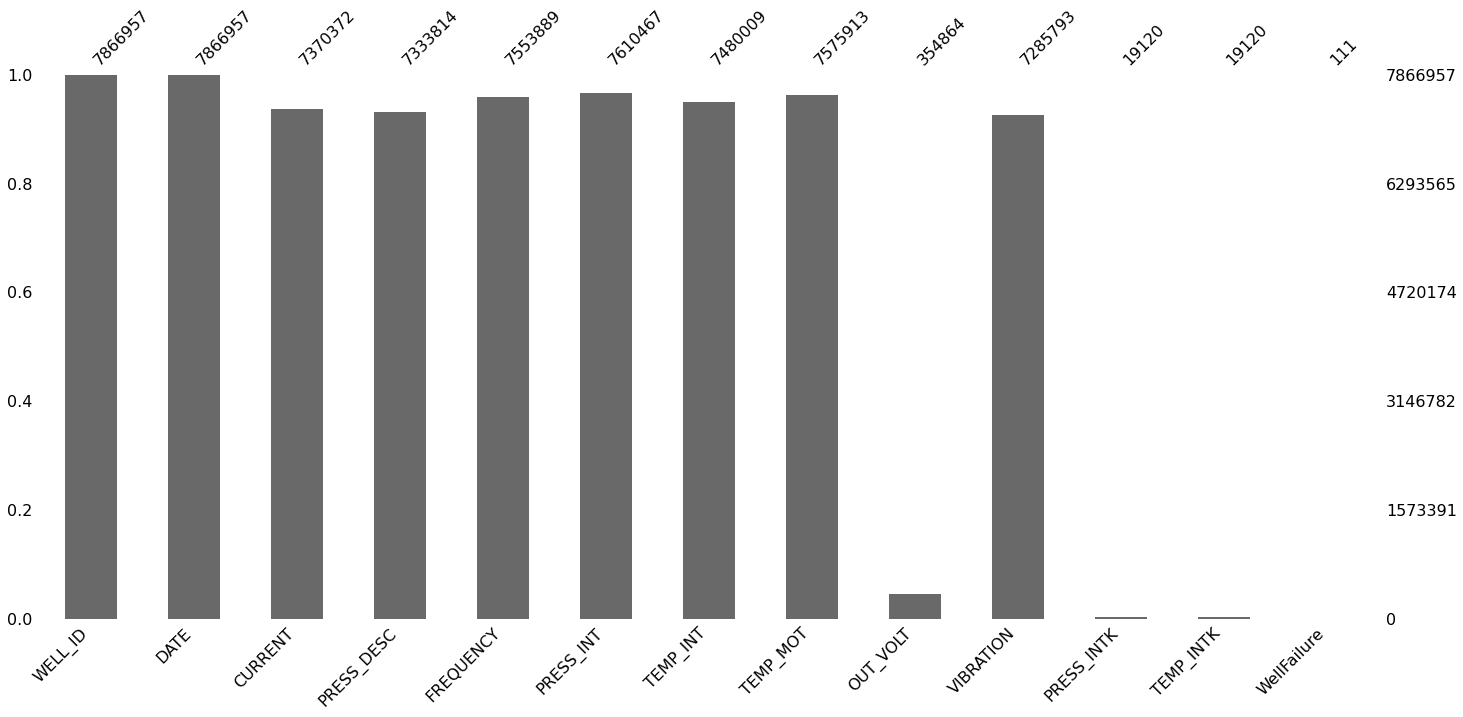

In [31]:
# Visualizing null values
msno.bar(esp_train)

In [32]:
# Drop PRESS_INTK and TEMP_INTK columns
esp_train.drop(['PRESS_INTK', 'TEMP_INTK'], axis=1, inplace=True)

In [33]:
# Checking number of wells
len(esp_train['WELL_ID'].unique())

100

# 1.2 Importing Test Data

In [34]:
# Test production data
prod_test = pd.read_csv(path_test/'production_test.csv', parse_dates=[1])
prod_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WELL_ID         2090 non-null   object        
 1   DATE            2090 non-null   datetime64[ns]
 2   BFPD            2090 non-null   float64       
 3   BOPD            2079 non-null   float64       
 4   BWPD            2090 non-null   float64       
 5   MSCF            2085 non-null   float64       
 6   BSW             2090 non-null   float64       
 7   GOR(MSFC/BPPD)  2090 non-null   float64       
 8   GLR(SCF/BFPD)   2090 non-null   float64       
 9   API             2056 non-null   float64       
 10  FREC(Hz)        1402 non-null   float64       
 11  PIP(PSI)        1237 non-null   float64       
 12  PROF_INTAKE     1429 non-null   float64       
 13  AMPERAGE        1604 non-null   float64       
 14  PUMP            2090 non-null   object        
 15  PSI_

In [35]:
# Number of wells test data
len(prod_test['WELL_ID'].unique())

15

In [36]:
## Directory test files
files_test = glob.glob(str(path_test) + "/*.csv")
files_test[:-1]

['C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_01_JAN.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_02_FEB.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_03_MAR.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_04_APR.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_05_MAY.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_06_JUN.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_07_JUL.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_08_AUG.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_09_SEP.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_10_OCT.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_11_NOV.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-challenge\\Data\\Test\\2020_12_DEC.csv',
 'C:\\Users\\fredd\\PycharmProjects\\E-c

In [37]:
csv_test = pd.DataFrame()
for csv_file in files_test[:-1]:
    df_test = pd.read_csv(csv_file, parse_dates=[1])
    csv_test = csv_test.append(df_test)

In [38]:
# Make a copy of the test data
esp_test = csv_test.copy()

In [39]:
# Merge both columns: PRESS_INT and PRESS_INTK - TEMP_INT and TEMP_INTK
esp_test['PRESS_INT'] = esp_test['PRESS_INT'].fillna(esp_test['PRESS_INTK'])
esp_test['TEMP_INT'] = esp_test['TEMP_INT'].fillna(esp_test['TEMP_INTK'])

In [40]:
esp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143020 entries, 0 to 3627
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   WELL_ID      1143020 non-null  object        
 1   DATE         1143020 non-null  datetime64[ns]
 2   CURRENT      1081076 non-null  float64       
 3   PRESS_DESC   988449 non-null   float64       
 4   FREQUENCY    1108460 non-null  float64       
 5   PRESS_INT    1075544 non-null  float64       
 6   TEMP_INT     1059757 non-null  float64       
 7   TEMP_MOT     1076759 non-null  float64       
 8   OUT_VOLT     45406 non-null    float64       
 9   VIBRATION    1018841 non-null  float64       
 10  PRESS_INTK   3628 non-null     float64       
 11  TEMP_INTK    3628 non-null     float64       
 12  WellFailure  0 non-null        float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 122.1+ MB


In [41]:
# Counting null values
esp_test.isna().sum()

WELL_ID              0
DATE                 0
CURRENT          61944
PRESS_DESC      154571
FREQUENCY        34560
PRESS_INT        67476
TEMP_INT         83263
TEMP_MOT         66261
OUT_VOLT       1097614
VIBRATION       124179
PRESS_INTK     1139392
TEMP_INTK      1139392
WellFailure    1143020
dtype: int64

<AxesSubplot:>

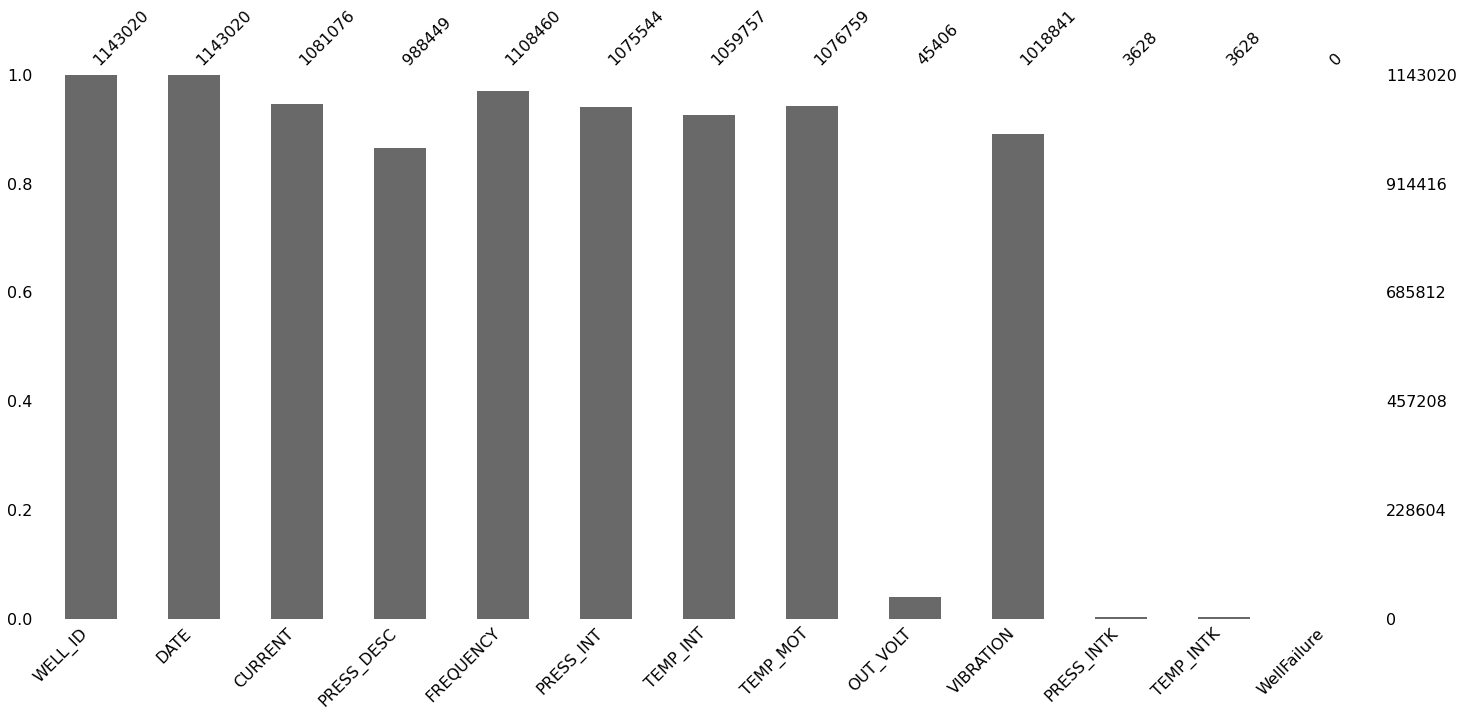

In [42]:
# Visualizing null values in the test set
msno.bar(esp_test)

In [43]:
# Drop columns PRESS_INTK and TEMP_INTK
esp_test.drop(['PRESS_INTK', 'TEMP_INTK'], axis=1, inplace=True)

In [44]:
# Checking number of wells
len(esp_test['WELL_ID'].unique())

15

#  2.Importing well locations

In [46]:
well_locations = pd.read_csv(ROOT_DIR/'Data'/'well_locations.csv')
well_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WELL_ID  115 non-null    object 
 1   lat      115 non-null    float64
 2   lon      115 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


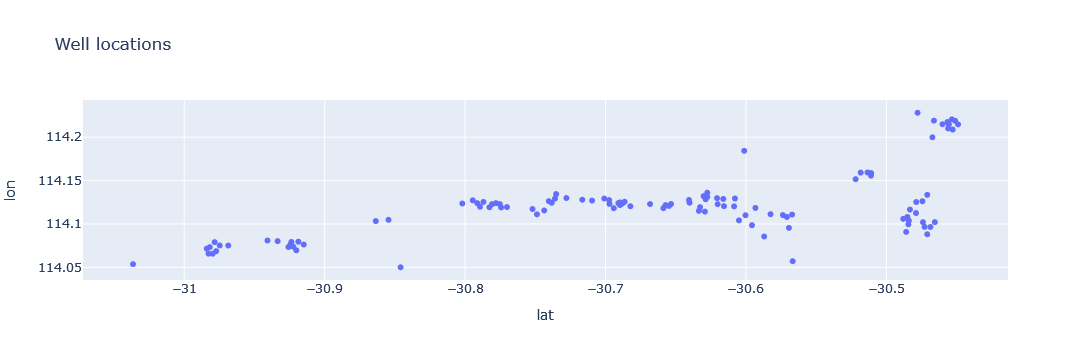

In [47]:
# Plotting well locations
fig = px.scatter(well_locations, x='lat', y='lon', hover_data=['WELL_ID'], title='Well locations')
fig.show()

# 2. Exploratory data analysis

## 2.1 Boxplots ESP data

In [48]:
# ESP data
esp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7866957 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 720.2+ MB


In [49]:
esp_train.describe()

CURRENT    PRESS_DESC     FREQUENCY     PRESS_INT      TEMP_INT  \
count  7.370372e+06  7.333814e+06  7.553889e+06  7.610467e+06  7.480009e+06   
mean   3.642987e+01  3.587022e+03  5.709056e+01  1.233715e+03  2.952355e+02   
std    2.910439e+01  2.130709e+03  2.683181e+01  7.865707e+03  9.174267e+02   
min    0.000000e+00 -3.276000e+03  0.000000e+00  0.000000e+00 -3.180400e+03   
25%    2.200000e+01  3.650000e+03  5.300000e+01  2.590000e+02  2.260000e+02   
50%    3.300000e+01  3.952300e+03  5.600000e+01  3.620000e+02  2.300000e+02   
75%    5.400000e+01  4.123000e+03  6.000000e+01  7.220000e+02  2.350000e+02   
max    5.197000e+04  9.490690e+04  5.051000e+03  1.898138e+05  1.182700e+04   

           TEMP_MOT       OUT_VOLT     VIBRATION  
count  7.575913e+06  354864.000000  7.285793e+06  
mean   2.757911e+02     336.477454  2.618494e+02  
std    1.463897e+02     186.673191  4.127619e+03  
min   -1.778000e+01       0.000000  0.000000e+00  
25%    2.670000e+02     378.200010  0.000000e+00  
50%    2.836000e+02     433.899990  0.000000e+00  
75%    2.960000e+02     458.600010  0.000000e+00  
max    6.553500e+03     953.000000  6.553500e+04

In [50]:
# Counting null values
esp_train.isna().sum()

WELL_ID              0
DATE                 0
CURRENT         496585
PRESS_DESC      533143
FREQUENCY       313068
PRESS_INT       256490
TEMP_INT        386948
TEMP_MOT        291044
OUT_VOLT       7512093
VIBRATION       581164
WellFailure    7866846
dtype: int64

<AxesSubplot:xlabel='WellFailure', ylabel='count'>

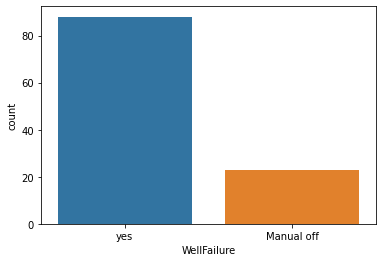

In [51]:
# Checking ESP Failures
sns.countplot(data=esp_train, x='WellFailure')


In [52]:
# Creating function to make a boxplot
def box_plot(df, x, y, yuplim=None):
    fig, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(data=df, x=x, y=y)
    fig.axis(ymin=0, ymax=yuplim);
    plt.xticks(rotation=90);

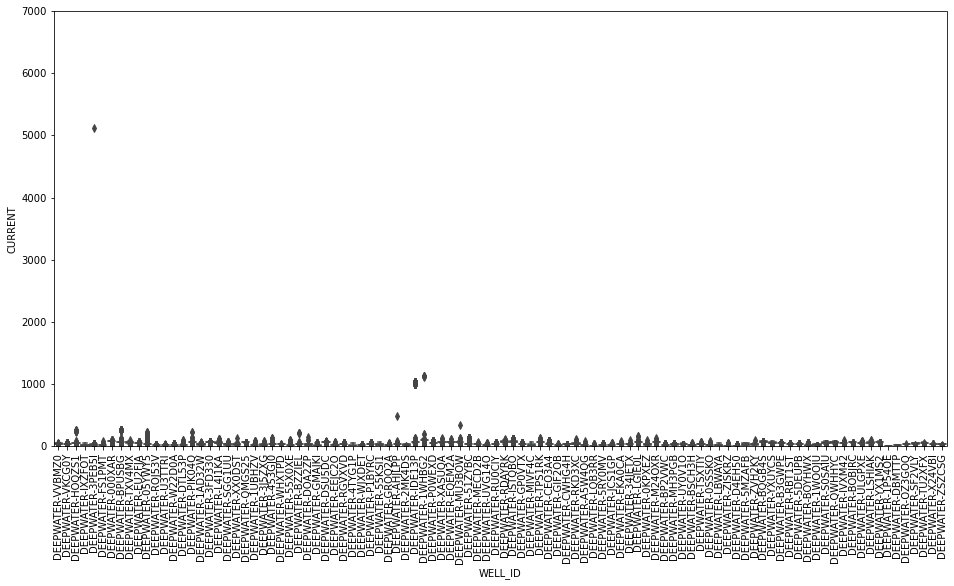

In [53]:
# Current variable 
box_plot(esp_train, 'WELL_ID', 'CURRENT', 7000)
# considerar valores de corriente entre 0 y 100
#--'DEEPWATER-1WHBG2', 'DEEPWATER-HOQZS1', 'DEEPWATER-BPUSBG',
#'DEEPWATER-BZZIEL', --'DEEPWATER-MU3BOW', 'DEEPWATER-PIK04Q',
#--'DEEPWATER-IDE13P', 'DEEPWATER-LGIE0L', --'DEEPWATER-AHJLPP',
#'DEEPWATER-EQEM2A', --'DEEPWATER-3PEB5I', 'DEEPWATER-05YWY5'

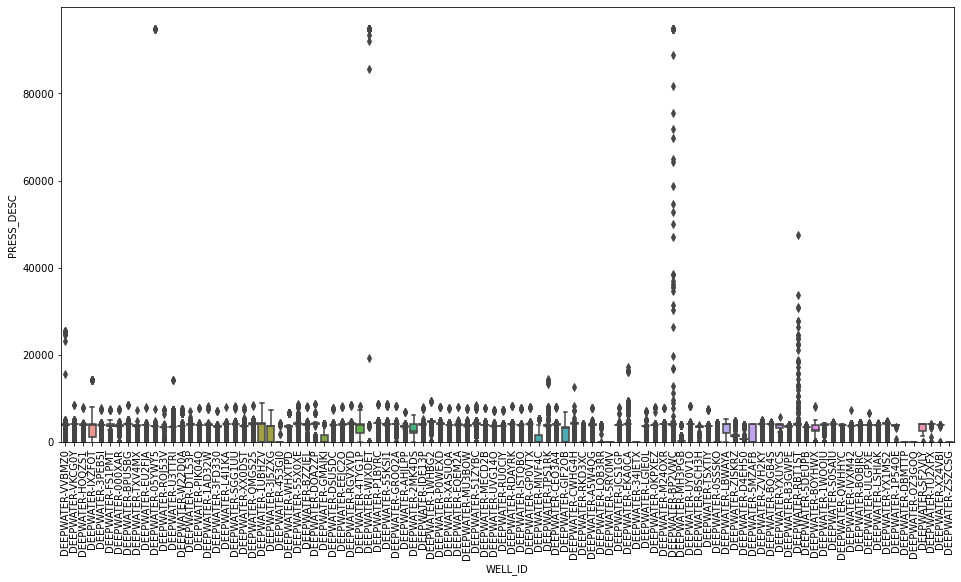

In [54]:
# Boxplot: Descharge pressure variable
box_plot(esp_train, 'WELL_ID', 'PRESS_DESC')
#considerar valores hasta 4500

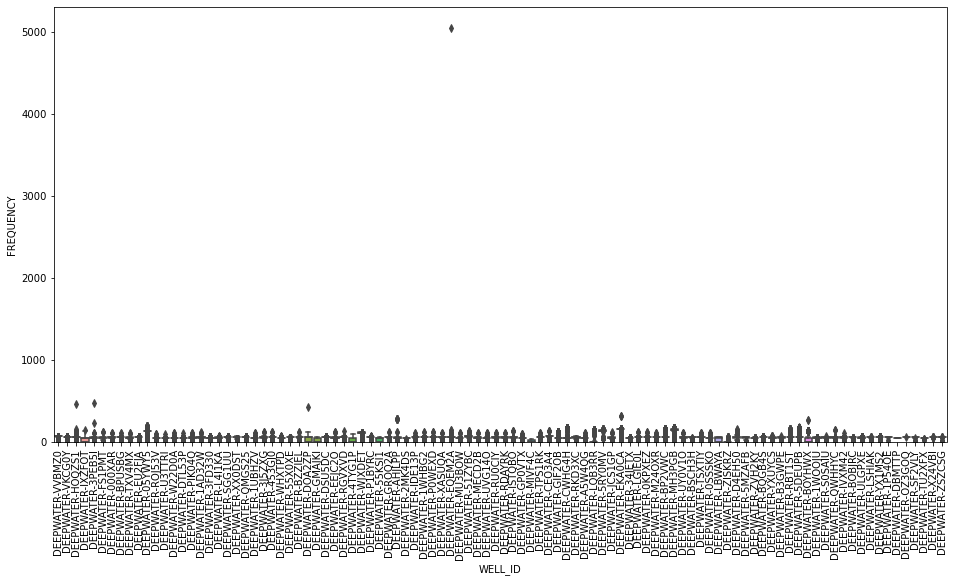

In [55]:
# Boxplot: frequency variable
box_plot(esp_train, 'WELL_ID', 'FREQUENCY') 
# considerar valores de frecuencia hasta 65 hz

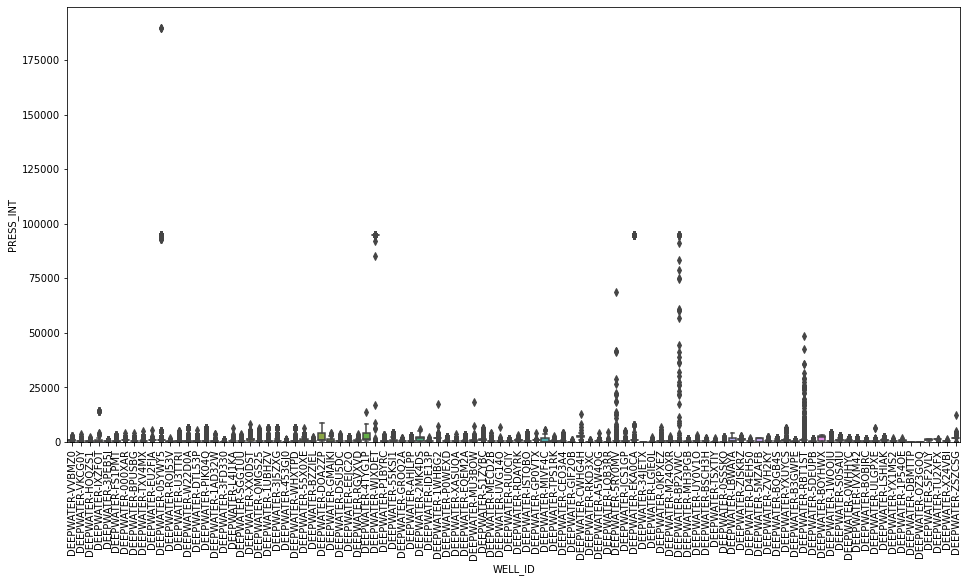

In [56]:
# Boxplot: intake pressure
box_plot(esp_train, 'WELL_ID', 'PRESS_INT')
# valores hasta 4500

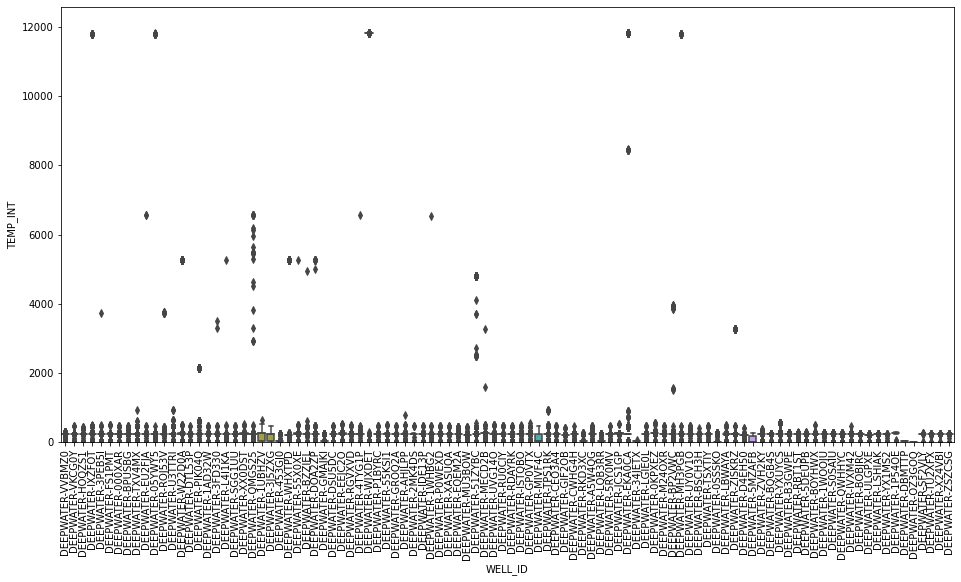

In [57]:
# Boxplot: intake temperature
box_plot(esp_train, 'WELL_ID', 'TEMP_INT')
# valores de temperatura hasta 300

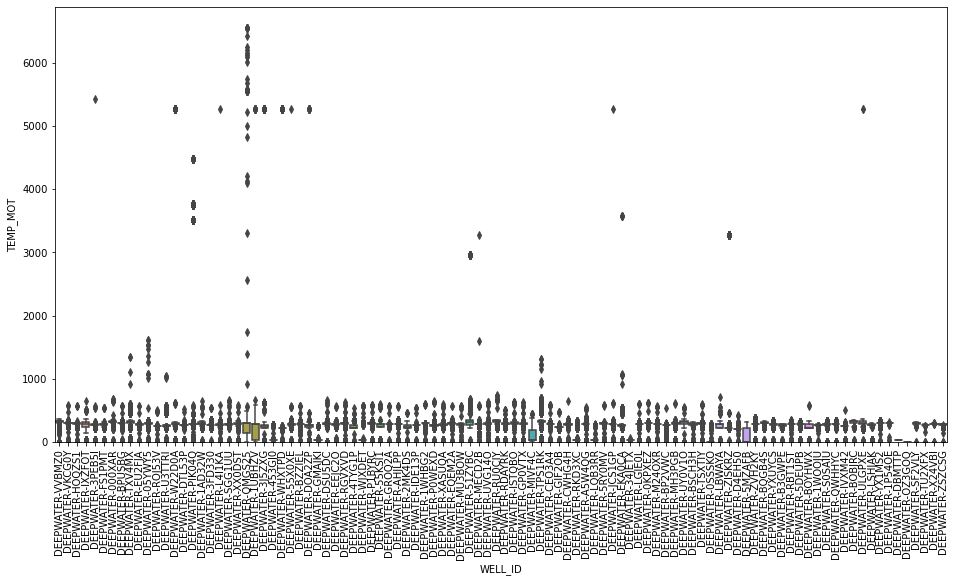

In [58]:
# Boxplot: motor temperature
box_plot(esp_train, 'WELL_ID', 'TEMP_MOT')
# valores hasta 350

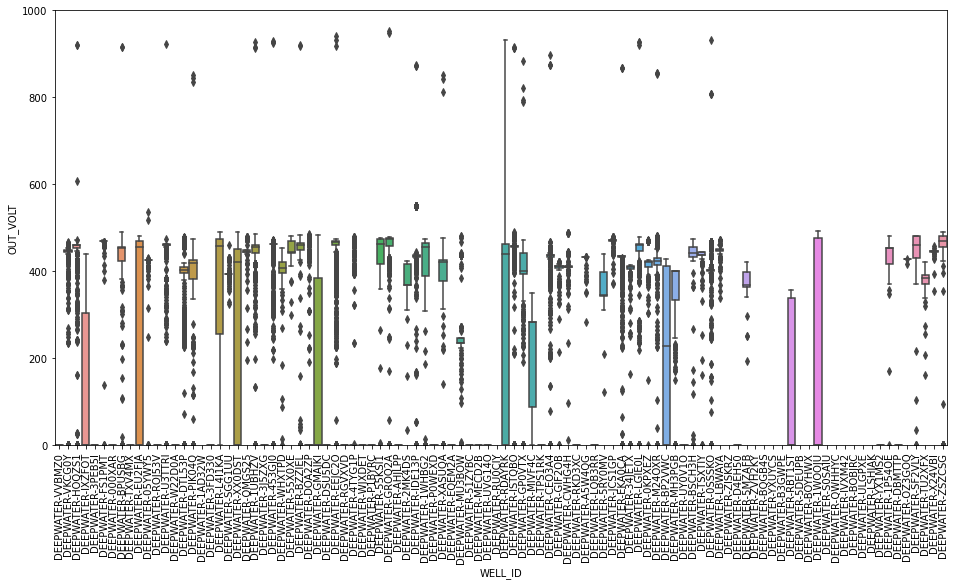

In [59]:
# Boxplot: motor temperature
box_plot(esp_train, 'WELL_ID', 'OUT_VOLT')
# podria considerarse hasta 480

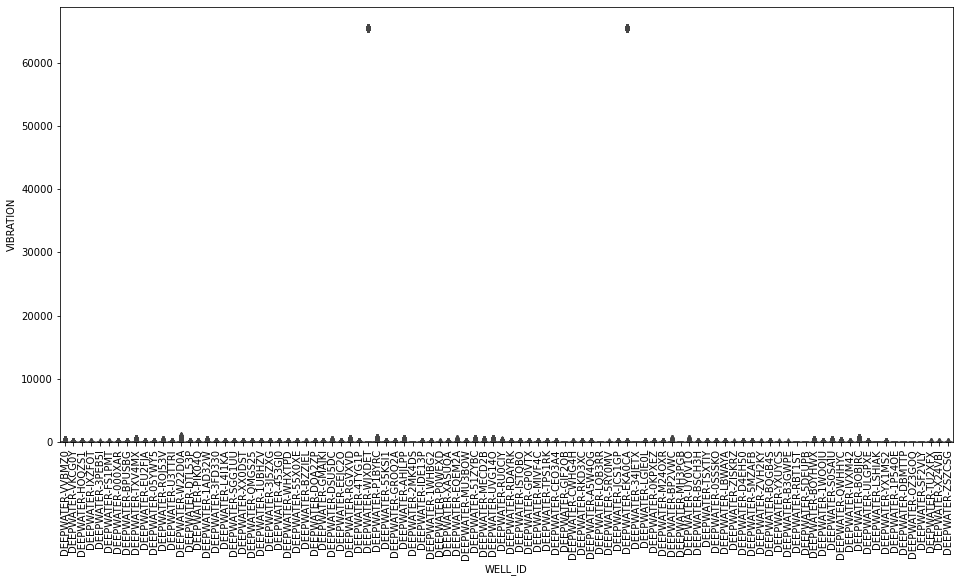

In [60]:
# Boxplot: motor temperature
box_plot(esp_train, 'WELL_ID', 'VIBRATION')
# considerar hasta 5

## 2.2 Boxplots production data

In [61]:
# Production data
prod_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WELL_ID         14508 non-null  object        
 1   DATE            14508 non-null  datetime64[ns]
 2   BFPD            14503 non-null  float64       
 3   BOPD            14462 non-null  float64       
 4   BWPD            14504 non-null  float64       
 5   MSCF            14484 non-null  float64       
 6   BSW             14504 non-null  float64       
 7   GOR(MSFC/BPPD)  14508 non-null  float64       
 8   GLR(SCF/BFPD)   14508 non-null  float64       
 9   API             14359 non-null  float64       
 10  FREC(Hz)        9832 non-null   float64       
 11  PIP(PSI)        9171 non-null   float64       
 12  PROF_INTAKE     10200 non-null  float64       
 13  AMPERAGE        11305 non-null  float64       
 14  PUMP            14508 non-null  object        
 15  PS

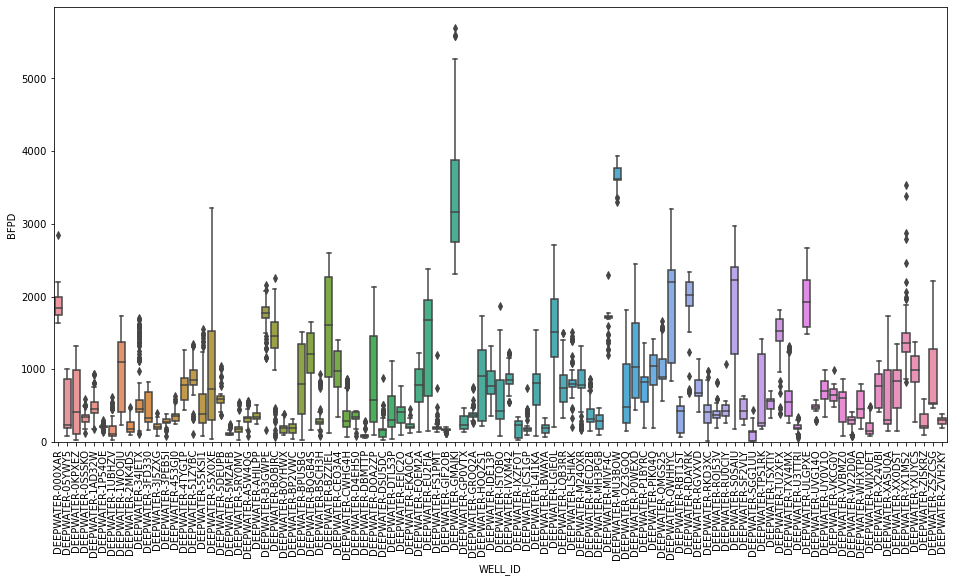

In [62]:
# Boxplot: liquid rate
box_plot(prod_train, 'WELL_ID', 'BFPD')

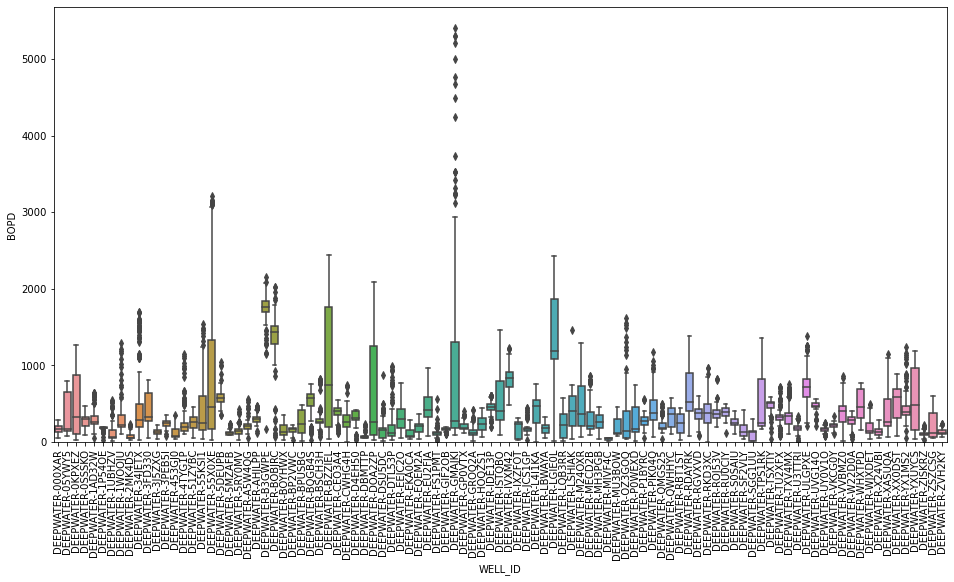

In [63]:
# Boxplot: oil rate
box_plot(prod_train, 'WELL_ID', 'BOPD')

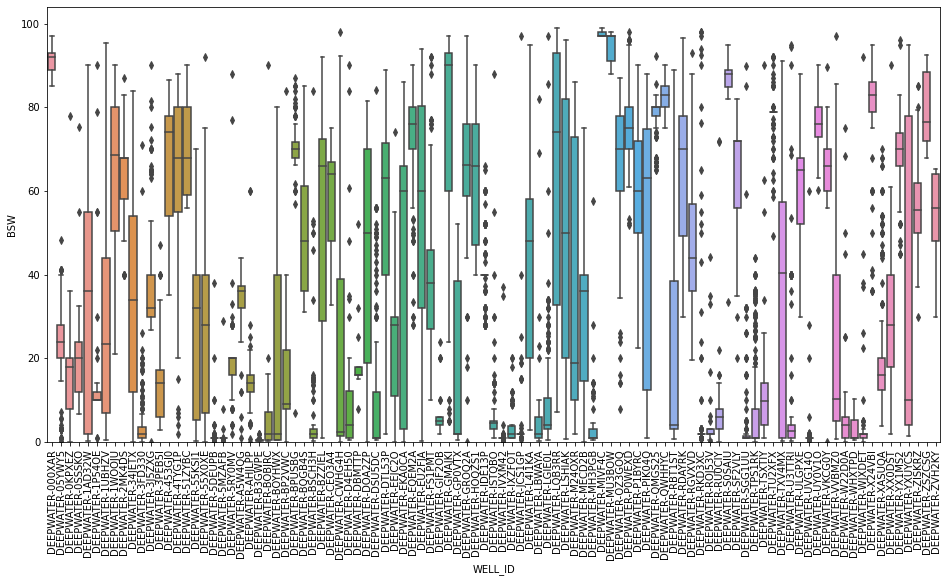

In [64]:
# Boxplot:  water cut
box_plot(prod_train, 'WELL_ID', 'BSW')

In [65]:
# Identifying the wells with reported failure
wells_failure = esp_train[esp_train['WellFailure'] == 'yes']
len(wells_failure.WELL_ID.unique())

83

In [66]:
no_failure = esp_train[esp_train['WellFailure'] == 'Manual off']
len(no_failure.WELL_ID.unique())

23

In [67]:
len(esp_train.WELL_ID.unique())

100

In [68]:
# There are wells that have a reported failure and manual off as the well 'DEEPWATER-L4I1KA'
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-L4I1KA') & (esp_train['WellFailure'] == 'yes')]

WELL_ID                DATE  CURRENT  PRESS_DESC  FREQUENCY  \
88  DEEPWATER-L4I1KA 2020-06-01 00:19:47      0.0      1687.0        0.0   

    PRESS_INT  TEMP_INT  TEMP_MOT  OUT_VOLT  VIBRATION WellFailure  
88     1057.0     231.6     231.0       NaN        0.0         yes

In [69]:
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-L4I1KA') & (esp_train['WellFailure'] == 'Manual off')]

WELL_ID                DATE    CURRENT  PRESS_DESC  FREQUENCY  \
74064  DEEPWATER-L4I1KA 2020-02-20 00:25:38  43.400002         NaN       65.5   

       PRESS_INT  TEMP_INT  TEMP_MOT   OUT_VOLT  VIBRATION WellFailure  
74064        0.0      32.0      32.0  476.60001        0.0  Manual off

In [70]:
# Other well with doble report: Wellfailure and manual off
#'DEEPWATER-CWHG4H'
#'DEEPWATER-TXV4MX'
#'DEEPWATER-ISTQBO'

In [71]:
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-ISTQBO') & (esp_train['WellFailure'] == 'yes')]

WELL_ID                DATE  CURRENT  PRESS_DESC  FREQUENCY  \
71793  DEEPWATER-ISTQBO 2021-03-11 13:54:09      0.0      3580.0        0.0   

       PRESS_INT  TEMP_INT  TEMP_MOT  OUT_VOLT  VIBRATION WellFailure  
71793      755.0     226.8     227.0       NaN        0.0         yes

In [72]:
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-ISTQBO') & (esp_train['WellFailure'] == 'Manual off')]

WELL_ID                DATE  CURRENT  PRESS_DESC  FREQUENCY  \
705832  DEEPWATER-ISTQBO 2020-09-25 00:19:02     30.0      3863.0       66.0   

        PRESS_INT  TEMP_INT  TEMP_MOT  OUT_VOLT  VIBRATION WellFailure  
705832      633.0     248.7     337.0       NaN        0.0  Manual off

# 3. Filtering ESP data

In [73]:
# Posible situations
# 1. Frozen sensor
# 2. Station Shutdown 
# 3. Sensor out of calibration

In [74]:
# Filtering esp data
esp_train_fil = esp_train[ (esp_train['CURRENT'] >= 0) & (esp_train['CURRENT'] <= 500) ]
#esp_train_fil = esp_train[ (esp_train['PRESS_DESC'] >= 0) & (esp_train['PRESS_DESC'] <= 4500) ]
#esp_train_fil = esp_train[ (esp_train['FREQUENCY'] >= 0) & (esp_train['FREQUENCY'] <= 65) ]
#esp_train_fil = esp_train[ (esp_train['PRESS_INTK'] >= 0) & (esp_train['PRESS_INTK'] <= 4500) ]
#esp_train_fil = esp_train[ (esp_train['TEMP_INT'] >= 0) & (esp_train['TEMP_INT'] <= 300) ]
#esp_train_fil = esp_train[ (esp_train['TEMP_MOT'] >= 0) & (esp_train['TEMP_MOT'] <= 350) ]
#esp_train_fil = esp_train[ (esp_train['VIBRATION'] >= 0) & (esp_train['VIBRATION'] <= 5) ]
#esp_train_fil = esp_train[ (esp_train['TEMP_INTK'] >= 0) & (esp_train['TEMP_INTK'] <= 300) ]
len(esp_train_fil.WELL_ID.unique())

100

In [75]:
wells_failure_v2 = esp_train_fil[esp_train_fil['WellFailure'] == 'yes']
len(wells_failure_v2.WELL_ID.unique())

80

In [76]:
wells_no_failure = esp_train_fil[esp_train_fil['WellFailure'] == 'Manual off']
wells_no_failure.WELL_ID.unique()

array(['DEEPWATER-ZISKRZ', 'DEEPWATER-L4I1KA', 'DEEPWATER-453GJ0',
       'DEEPWATER-5DEUPB', 'DEEPWATER-ISTQBO', 'DEEPWATER-LSHIAK',
       'DEEPWATER-5MZAFB', 'DEEPWATER-1UBHZV', 'DEEPWATER-51ZYBC',
       'DEEPWATER-0KPXEZ', 'DEEPWATER-1WHBG2', 'DEEPWATER-2MK4DS',
       'DEEPWATER-BSCH3H', 'DEEPWATER-D4EH50', 'DEEPWATER-LQB3RR',
       'DEEPWATER-MIVF4C', 'DEEPWATER-MU3BOW', 'DEEPWATER-TU2XFX',
       'DEEPWATER-XASUQA'], dtype=object)

<AxesSubplot:xlabel='WellFailure', ylabel='count'>

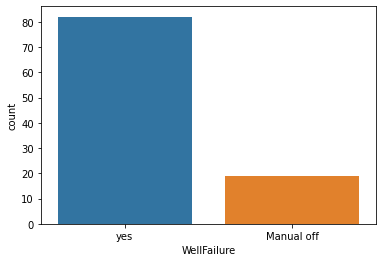

In [77]:
# Checking ESP Failures
sns.countplot(data=esp_train_fil, x='WellFailure')

In [78]:
# Aftering filter values acordding current parameter, 3 recordings are lost respect to wellfailure=yes:
# 'DEEPWATER-DSU5DC'

esp_train_fil[(esp_train_fil['WELL_ID'] == 'DEEPWATER-DSU5DC') & (esp_train_fil['WellFailure'] == 'yes')]

Empty DataFrame
Columns: [WELL_ID, DATE, CURRENT, PRESS_DESC, FREQUENCY, PRESS_INT, TEMP_INT, TEMP_MOT, OUT_VOLT, VIBRATION, WellFailure]
Index: []

In [79]:
# 'DEEPWATER-P0WEXD'
esp_train_fil[(esp_train_fil['WELL_ID'] == 'DEEPWATER-P0WEXD') & (esp_train_fil['WellFailure'] == 'yes')]

Empty DataFrame
Columns: [WELL_ID, DATE, CURRENT, PRESS_DESC, FREQUENCY, PRESS_INT, TEMP_INT, TEMP_MOT, OUT_VOLT, VIBRATION, WellFailure]
Index: []

In [80]:
#'DEEPWATER-EEJC2O'
esp_train_fil[(esp_train_fil['WELL_ID'] == 'DEEPWATER-EEJC2O') & (esp_train_fil['WellFailure'] == 'yes')]

Empty DataFrame
Columns: [WELL_ID, DATE, CURRENT, PRESS_DESC, FREQUENCY, PRESS_INT, TEMP_INT, TEMP_MOT, OUT_VOLT, VIBRATION, WellFailure]
Index: []

In [81]:
# Aftering filter values acordding current parameter, 3 recordings are lost respect to wellfailure=manual off:
# 'DEEPWATER-TXV4MX'
esp_train_fil[(esp_train_fil['WELL_ID'] == 'DEEPWATER-TXV4MX') & (esp_train_fil['WellFailure'] == 'Manual off')]

Empty DataFrame
Columns: [WELL_ID, DATE, CURRENT, PRESS_DESC, FREQUENCY, PRESS_INT, TEMP_INT, TEMP_MOT, OUT_VOLT, VIBRATION, WellFailure]
Index: []

In [82]:
# 'DEEPWATER-CWHG4H'
esp_train_fil[(esp_train_fil['WELL_ID'] == 'DEEPWATER-CWHG4H') & (esp_train_fil['WellFailure'] == 'Manual off')]

Empty DataFrame
Columns: [WELL_ID, DATE, CURRENT, PRESS_DESC, FREQUENCY, PRESS_INT, TEMP_INT, TEMP_MOT, OUT_VOLT, VIBRATION, WellFailure]
Index: []

In [83]:
# These two well are not counted as wellfailure or manual off , they appear in the df but not with the label 'Manual off'
#'DEEPWATER-3FD330'
#'DEEPWATER-55KSI1'

# Total wells are losing their label as manual off or yes
# yes:  'DEEPWATER-DSU5DC', 'DEEPWATER-P0WEXD', 'DEEPWATER-EEJC2O'

esp_train[esp_train['WELL_ID'] == 'DEEPWATER-DSU5DC'] # not filtered due to current null values when wellfailure=yes
esp_train[esp_train['WELL_ID'] == 'DEEPWATER-P0WEXD'] # not filtered due to current null values when wellfailure=yes
esp_train[esp_train['WELL_ID'] == 'DEEPWATER-EEJC2O'] # not filtered due to current null values when wellfailure=yes

WELL_ID                DATE    CURRENT  PRESS_DESC  FREQUENCY  \
33    DEEPWATER-EEJC2O 2020-01-01 08:11:27  20.900000   4120.5996       62.0   
95    DEEPWATER-EEJC2O 2020-01-01 08:31:27  21.000000   4115.2998       62.0   
166   DEEPWATER-EEJC2O 2020-01-01 08:51:27  20.900000   4116.1001       62.0   
230   DEEPWATER-EEJC2O 2020-01-01 09:11:27  21.000000   4116.3999       62.0   
301   DEEPWATER-EEJC2O 2020-01-01 09:31:27  21.200001   4104.2998       62.0   
...                ...                 ...        ...         ...        ...   
7671  DEEPWATER-EEJC2O 2019-12-27 00:00:00  21.090000   4115.2000       62.0   
7672  DEEPWATER-EEJC2O 2019-12-28 00:00:00  20.970000   4109.6600       62.0   
7673  DEEPWATER-EEJC2O 2019-12-29 00:00:00  20.910000   4111.3300       62.0   
7674  DEEPWATER-EEJC2O 2019-12-30 00:00:00  20.860000   4114.7100       62.0   
7675  DEEPWATER-EEJC2O 2019-12-31 00:00:00  20.900000   4126.4500       62.0   

      PRESS_INT   TEMP_INT   TEMP_MOT   OUT_VOLT  VIBRATION WellFailure  
33    316.89999  251.10001  277.70001  468.79999   0.300204         NaN  
95    316.29999  250.90001  277.70001  470.39999   0.300204         NaN  
166   317.09998  251.10001  277.70001  471.50000   0.400271         NaN  
230   317.19998  250.90001  277.70001  468.00000   0.200136         NaN  
301   316.09998  250.90001  277.70001  470.20001   0.300204         NaN  
...         ...        ...        ...        ...        ...         ...  
7671  323.89000  252.32000  279.53000  470.38000   0.300000         NaN  
7672  305.79000  252.59000  279.32000  470.49000   0.290000         NaN  
7673  309.95000  253.31000  279.74000  470.45000   0.300000         NaN  
7674  320.37000  253.07000  279.56000  470.57000   0.290000         NaN  
7675  338.12000  253.10000  279.57000  470.37000   0.290000         NaN  

[48940 rows x 11 columns]

In [84]:
# manual off: 'DEEPWATER-TXV4MX', 'DEEPWATER-CWHG4H', 'DEEPWATER-3FD330', 'DEEPWATER-55KSI1'
# not filtered due to current null values when wellfailure ='Manual off'
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-TXV4MX') & (esp_train['WellFailure'] == 'Manual off')]
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-CWHG4H') & (esp_train['WellFailure'] == 'Manual off')]
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-3FD330') & (esp_train['WellFailure'] == 'Manual off')]
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-55KSI1') & (esp_train['WellFailure'] == 'Manual off')]

WELL_ID       DATE  CURRENT  PRESS_DESC  FREQUENCY  PRESS_INT  \
5726  DEEPWATER-55KSI1 2020-02-02      NaN   4351.1997        NaN  468.19998   

       TEMP_INT   TEMP_MOT  OUT_VOLT  VIBRATION WellFailure  
5726  239.20001  273.89999       NaN   0.800543  Manual off

In [85]:
filt_2 = esp_train[(esp_train['CURRENT'] <= 500) | (esp_train['CURRENT'].isnull())]
filt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7866479 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 720.2+ MB


In [86]:
len(filt_2[filt_2['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [87]:
len(filt_2[filt_2['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [88]:
# Filtering for deleting abnormal frequency values
filt_2_v2 = filt_2[(filt_2['FREQUENCY'] <= 200) | (filt_2['FREQUENCY'].isnull())]
len(filt_2_v2[filt_2_v2['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [89]:
len(filt_2_v2[filt_2_v2['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [90]:
filt_2_v2[(filt_2_v2['TEMP_MOT'] > 700) & (filt_2_v2['WellFailure'] == 'yes' )]

Empty DataFrame
Columns: [WELL_ID, DATE, CURRENT, PRESS_DESC, FREQUENCY, PRESS_INT, TEMP_INT, TEMP_MOT, OUT_VOLT, VIBRATION, WellFailure]
Index: []

In [91]:
# Filtering for deleting abnormal motor temperature values
filt_2_v3 = filt_2_v2[(filt_2_v2['TEMP_MOT'] <= 800) | (filt_2_v2['TEMP_MOT'].isnull())]
len(filt_2_v3[filt_2_v3['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [92]:
len(filt_2_v3[filt_2_v3['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [93]:
# Filtering for deleting abnormal intake temperature values

In [94]:
filt_2_v4 = filt_2_v3[(filt_2_v3['TEMP_INT'] <= 15000) | (filt_2_v3['WellFailure'] != 'yes') | (filt_2_v3['TEMP_INT'].isnull())]

In [95]:
len(filt_2_v4[filt_2_v4['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [96]:
len(filt_2_v4[filt_2_v4['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [97]:
filt_2_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860524 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 719.7+ MB


In [98]:
# Filtering for deleting abnormal vibration values
filt_2_v5 = filt_2_v4[(filt_2_v4['VIBRATION'] <= 70000) | (filt_2_v4['WellFailure'] != 'yes') | (filt_2_v4['VIBRATION'].isnull())]

In [99]:
len(filt_2_v5[filt_2_v5['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [100]:
len(filt_2_v5[filt_2_v5['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [101]:
filt_2_v6 = filt_2_v5[(filt_2_v5['OUT_VOLT'] <= 500) | (filt_2_v5['OUT_VOLT'].isnull())]

In [102]:
filt_2_v6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860470 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 719.6+ MB


In [103]:
filt_2_v6['CURRENT'].min()

0.0

In [104]:
len(filt_2_v6[filt_2_v6['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [105]:
len(filt_2_v6[filt_2_v6['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [106]:
# Filtering to eliminate abnormal values of descharge pressure
filt_2_v7 = filt_2_v6[(filt_2_v6['PRESS_DESC'] < 90000) | (filt_2_v6['PRESS_DESC'].isnull()) | (filt_2_v6['WellFailure'].notnull()) ]

In [107]:
filt_2_v7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7857728 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 719.4+ MB


In [108]:
len(filt_2_v7[filt_2_v7['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [109]:
len(filt_2_v7[filt_2_v7['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [110]:
# Filtering to eliminate abnormal values of intake pressure
filt_2_v8 = filt_2_v7[(filt_2_v7['PRESS_INT'] <= 100000) | (filt_2_v7['PRESS_INT'].isnull()) | (filt_2_v7['WellFailure'].notnull())]

In [111]:
len(filt_2_v8[filt_2_v8['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [112]:
len(filt_2_v8[filt_2_v8['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [113]:
filt_2_v8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7857725 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 719.4+ MB


In [114]:
# Filtering abnormal values of motor temperature
filt_2_v9 = filt_2_v8[(filt_2_v8['TEMP_MOT'] <= 700)  | (filt_2_v8['WellFailure'].notnull()) | (filt_2_v8['TEMP_MOT'].isnull())]

In [115]:
len(filt_2_v9[filt_2_v9['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [116]:
len(filt_2_v9[filt_2_v9['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [117]:
filt_2_v9[(filt_2_v9['TEMP_INT'] > 11000) & (filt_2_v9['WellFailure'] == 'yes')]

WELL_ID                DATE  CURRENT  PRESS_DESC  FREQUENCY  \
162888  DEEPWATER-EKA0CA 2021-01-08 00:19:33     18.0     -145.04      157.0   

        PRESS_INT  TEMP_INT  TEMP_MOT  OUT_VOLT  VIBRATION WellFailure  
162888    94908.0   11826.0      30.2       NaN    65535.0         yes

In [118]:
# Filtering abnormal values of intake temperature
filt_2_v10 = filt_2_v9[(filt_2_v9['TEMP_INT'] <= 700)  | (filt_2_v9['WellFailure'].notnull()) | (filt_2_v9['TEMP_INT'].isnull())]

In [119]:
filt_2_v10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810960 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 715.1+ MB


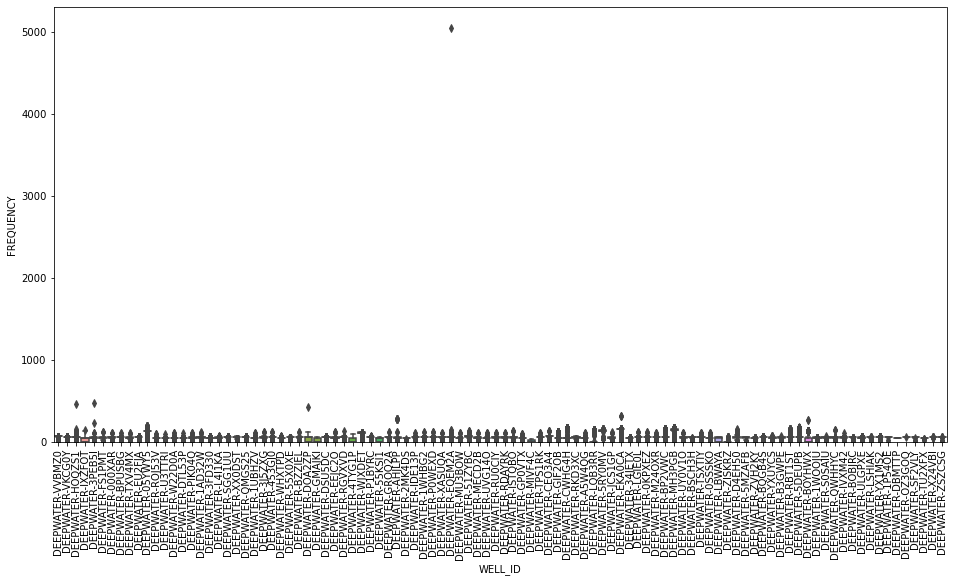

In [120]:
box_plot(esp_train, 'WELL_ID', 'FREQUENCY')

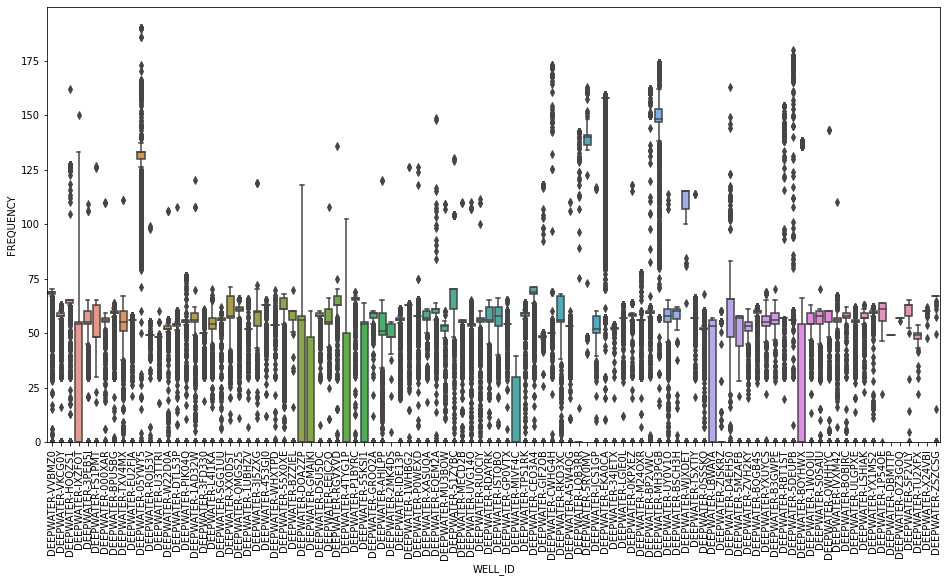

In [121]:
box_plot(filt_2_v10, 'WELL_ID', 'FREQUENCY')

In [122]:
# Final dataframe after filtering wrong data
train_data = filt_2_v10.copy()
train_data

WELL_ID                DATE    CURRENT  PRESS_DESC  FREQUENCY  \
0      DEEPWATER-VVBMZ0 2020-01-01 00:00:00   4.480000   2659.0600       0.55   
1      DEEPWATER-VKCG0Y 2020-01-01 08:00:31  24.799999   4172.1997      54.00   
2      DEEPWATER-HOQZS1 2020-01-01 08:01:14  39.200001   4008.9998      59.00   
3      DEEPWATER-IXZFOT 2020-01-01 08:01:54  20.900000   3996.2000     133.00   
4      DEEPWATER-3PEB5I 2020-01-01 08:02:22        NaN   3742.3000        NaN   
...                 ...                 ...        ...         ...        ...   
19114  DEEPWATER-ZSZCSG 2019-11-07 00:00:00   0.000000      0.0000       0.00   
19115  DEEPWATER-ZSZCSG 2019-11-08 00:00:00   0.000000      0.0000       0.00   
19116  DEEPWATER-ZSZCSG 2019-11-09 00:00:00   0.000000      0.0000       0.00   
19117  DEEPWATER-ZSZCSG 2019-11-10 00:00:00   0.000000      0.0000       0.00   
19118  DEEPWATER-ZSZCSG 2019-11-11 00:00:00   0.000000      0.0000       0.00   

        PRESS_INT   TEMP_INT   TEMP_MOT   OUT_VOLT  VIBRATION WellFailure  
0      1966.80000   80.64000  105.57000    0.00000   2.550000         yes  
1       460.50000  235.39999  279.09998  425.10001   0.200136         NaN  
2       354.20001  223.50000  280.19998  459.89999        NaN         NaN  
3       518.39996  243.50000  319.10001  304.00000        NaN         NaN  
4             NaN  232.20000  276.39999        NaN        NaN         NaN  
...           ...        ...        ...        ...        ...         ...  
19114  4127.67000  223.00000  223.24000    0.00000   0.110000         NaN  
19115  4127.75000  222.98000  223.20000    0.00000   0.110000         NaN  
19116  4125.95000  222.84000  223.11000    0.00000   0.150000         NaN  
19117  4126.17000  222.79000  223.12000    0.00000   0.110000         NaN  
19118  4122.66000  222.63000  222.84000    0.00000   0.130000         NaN  

[7810960 rows x 11 columns]

# Outliers treatment

<AxesSubplot:xlabel='DATE', ylabel='CURRENT'>

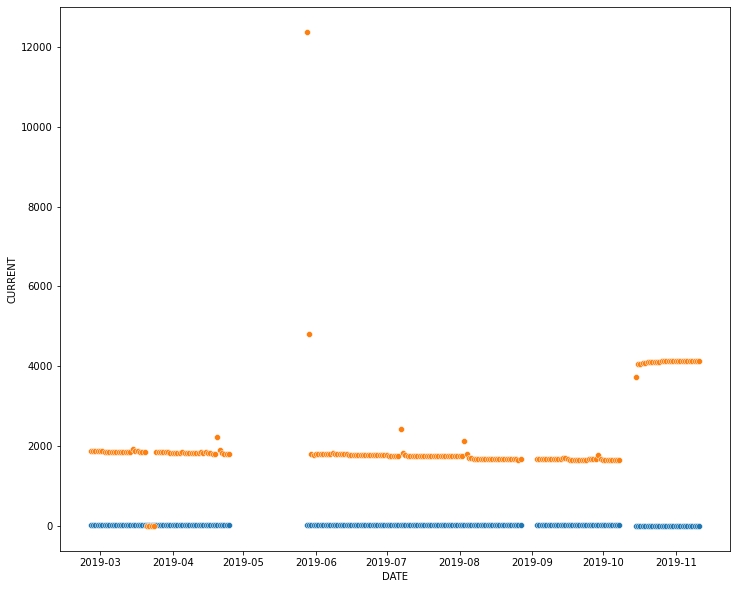

In [123]:
# Scatter plot
fig = plt.subplots(figsize=(12, 10))
well_zs = train_data[train_data['WELL_ID'] == 'DEEPWATER-ZSZCSG']
#sns.scatterplot(x='DATE', y='FREQUENCY', data=well_zs)
sns.scatterplot(x='DATE', y='CURRENT', data=well_zs)
#sns.scatterplot(x='DATE', y='PRESS_DESC', data=well_zs)
sns.scatterplot(x='DATE', y='PRESS_INT', data=well_zs)

In [ ]:
failures_zs = well_zs['Well']

# Filling null values

In [107]:
# Filling column WellFailure
train_data['WellFailure'].fillna('No', inplace=True)
train_data.isna().sum()

WELL_ID              0
DATE                 0
CURRENT         506577
PRESS_DESC      546089
FREQUENCY       312737
PRESS_INT       269454
TEMP_INT        399864
TEMP_MOT        303974
OUT_VOLT       8024387
VIBRATION       592045
WellFailure          0
dtype: int64

In [108]:
# Select only numerical variables
num_data = train_data.iloc[:, 2:-1]
num_data

CURRENT  PRESS_DESC  FREQUENCY   PRESS_INT   TEMP_INT   TEMP_MOT  \
0       4.480000   2659.0600       0.55  1966.80000   80.64000  105.57000   
1      24.799999   4172.1997      54.00   460.50000  235.39999  279.09998   
2      39.200001   4008.9998      59.00   354.20001  223.50000  280.19998   
3      20.900000   3996.2000     133.00   518.39996  243.50000  319.10001   
4            NaN   3742.3000        NaN         NaN  232.20000  276.39999   
...          ...         ...        ...         ...        ...        ...   
19114   0.000000      0.0000       0.00  4127.67000  223.00000  223.24000   
19115   0.000000      0.0000       0.00  4127.75000  222.98000  223.20000   
19116   0.000000      0.0000       0.00  4125.95000  222.84000  223.11000   
19117   0.000000      0.0000       0.00  4126.17000  222.79000  223.12000   
19118   0.000000      0.0000       0.00  4122.66000  222.63000  222.84000   

        OUT_VOLT  VIBRATION  
0        0.00000   2.550000  
1      425.10001   0.200136  
2      459.89999        NaN  
3      304.00000        NaN  
4            NaN        NaN  
...          ...        ...  
19114    0.00000   0.110000  
19115    0.00000   0.110000  
19116    0.00000   0.150000  
19117    0.00000   0.110000  
19118    0.00000   0.130000  

[8378508 rows x 8 columns]

In [109]:
# the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data
scaler = MinMaxScaler()
num_data = pd.DataFrame(scaler.fit_transform(num_data), columns = num_data.columns)
num_data.head()

CURRENT  PRESS_DESC  FREQUENCY  PRESS_INT  TEMP_INT  TEMP_MOT  OUT_VOLT  \
0  0.009333    0.064404   0.002895   0.020723  0.217310  0.173933  0.000000   
1  0.051667    0.080824   0.284211   0.004852  0.227623  0.418624  0.863375   
2  0.081667    0.079053   0.310526   0.003732  0.226830  0.420175  0.934054   
3  0.043542    0.078914   0.700000   0.005462  0.228163  0.475028  0.617422   
4       NaN    0.076159        NaN        NaN  0.227410  0.414817       NaN   

   VIBRATION  
0   0.000039  
1   0.000003  
2        NaN  
3        NaN  
4        NaN

In [ ]:
imputer = KNNImputer(n_neighbors=5)
num_ = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)